<a href="https://colab.research.google.com/github/twik2/python/blob/main/%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7_%D1%86%D0%B5%D0%BD_%D0%BD%D0%B0_%D0%B0%D0%B2%D1%82%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загрузил архив из облачного хранилища и распаковывал

In [ ]:
! gdown --id 1tXhSXT3Ud__danFdIfC9m6U3OS8YSrql
! unzip /content/db_cars_for_sales.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1tXhSXT3Ud__danFdIfC9m6U3OS8YSrql
To: /content/db_cars_for_sales.zip
100% 1.15M/1.15M [00:00<00:00, 58.9MB/s]
Archive:  /content/db_cars_for_sales.zip
  inflating: audi.csv                
  inflating: bmw.csv                 
  inflating: cclass.csv              
  inflating: focus.csv               
  inflating: ford.csv                
  inflating: hyundi.csv              
  inflating: merc.csv                
  inflating: skoda.csv               
  inflating: toyota.csv              
  inflating: unclean cclass.csv      
  inflating: unclean focus.csv       
  inflating: vauxhall.csv            
  inflating: vw.csv                  


Подготовил файл для дальнейшей работы

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from google.colab import drive
from sklearn.model_selection import train_test_split
df1 = pd.read_csv('/content/audi.csv')
df2 = pd.read_csv('/content/bmw.csv')
df3 = pd.read_csv('/content/ford.csv')
df4 = pd.read_csv('/content/merc.csv')
df5 = pd.read_csv('/content/skoda.csv')
df6 = pd.read_csv('/content/toyota.csv')
df7 = pd.read_csv('/content/vauxhall.csv')
df8 = pd.read_csv('/content/vw.csv')
cars_brands = ['audi', 'bmw', 'ford', 'mercedes', 'skoda', 'toyota', 'opel', 'volkswagen']
df1['brand']= cars_brands[0] #audi
df2['brand']= cars_brands[1] #bmw
df3['brand']= cars_brands[2] #mercedes
df4['brand']= cars_brands[3] #ford
df5['brand']= cars_brands[4] #skoda
df6['brand']= cars_brands[5] #toyota
df7['brand']= cars_brands[6] #opel(vauxhall)
df8['brand']= cars_brands[7] #volkswagen
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8])
df['engineSize/mpg'] = df['engineSize'] / df['mpg']
#df_for_rfc = df
df2 = pd.get_dummies(df.fuelType).astype(int)
df3 = pd.get_dummies(df.transmission).astype(int)
df4 = pd.get_dummies(df.model).astype(int)
df5 = pd.get_dummies(df.brand).astype(int)
df = pd.concat([df, df2, df3, df4, df5], axis=1)
df = df.drop(['model', 'transmission', 'fuelType', 'brand'], axis = 1)
df = df.reset_index(drop=True)
df = df.loc[:,~df.columns.duplicated()].copy()
df = df.drop(list(df.loc[:,df.sum() < 2]), axis = 1) #удаляю столбцы с единичными продаваемыми моделями
df = df[~(df['year']>2023)].reset_index(drop = True) #удаляю строку с машиной "из будущего"
df = df.drop_duplicates()
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('price', axis = 1), df['price'], test_size = 0.2, random_state = 100)
X_train_not_for_ols = X_train.copy()
Y_train_not_for_ols = Y_train.copy()
X_test_not_for_ols = X_test.copy()
Y_test_not_for_ols = Y_test.copy()

In [ ]:
df.tail(10)

,year,price,mileage,tax,mpg,engineSize,engineSize/mpg,Diesel,Electric,Hybrid,...,i3,i8,audi,bmw,ford,mercedes,opel,skoda,toyota,volkswagen
94316,2008,4995,65000,195,48.0,2.0,0.041667,1,0,0,...,0,0,0,0,0,0,0,0,0,1
94317,2008,3695,127000,280,34.5,2.0,0.057971,0,0,0,...,0,0,0,0,0,0,0,0,0,1
94318,2015,12495,41850,125,58.9,2.0,0.033956,1,0,0,...,0,0,0,0,0,0,0,0,0,1
94319,2014,8950,58000,125,58.9,2.0,0.033956,1,0,0,...,0,0,0,0,0,0,0,0,0,1
94320,2006,2995,92640,200,48.0,2.0,0.041667,1,0,0,...,0,0,0,0,0,0,0,0,0,1
94321,2012,5990,74000,125,58.9,2.0,0.033956,1,0,0,...,0,0,0,0,0,0,0,0,0,1
94322,2008,1799,88102,145,46.3,1.2,0.025918,0,0,0,...,0,0,0,0,0,0,0,0,0,1
94323,2009,1590,70000,200,42.0,1.4,0.033333,0,0,0,...,0,0,0,0,0,0,0,0,0,1
94324,2006,1250,82704,150,46.3,1.2,0.025918,0,0,0,...,0,0,0,0,0,0,0,0,0,1
94325,2007,2295,74000,145,46.3,1.2,0.025918,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
Y_test

51052    45000
24585     7695
1885     11495
25637    10698
10059    23000
         ...  
30685    16800
89870    24910
63557     7495
92752    22500
58498    29190
Name: price, Length: 18588, dtype: int64

Первая модель - линейная регрессия, обрабатываю тренировочные файлы, убираю мультиколлинеарность и факторы с низкими P-значениями

In [ ]:
dr = set()
for item in df.columns:
  if (df[item].mean() < 0.005) :
    dr.add(item)
  elif (df[item].mean() > 0.995):
    dr.add(item)
df = df.drop(dr, axis = 1)
r_max = 0.15
df_1 = pd.concat((X_train, Y_train), axis = 1)
target = 'price'
correlated_features = set()
correlation_matrix = df_1.corr()
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    if abs(correlation_matrix.iloc[i, j]) > r_max and correlation_matrix.columns[i] != target and correlation_matrix.columns[j] != target:
      if abs(correlation_matrix[target][correlation_matrix.columns[j]]) > abs(correlation_matrix[target][correlation_matrix.columns[i]]):
        correlated_features.add(correlation_matrix.columns[i])
      else:
        correlated_features.add(correlation_matrix.columns[j])
print(correlated_features)
X_train = X_train.drop(correlated_features, axis = 1)
X_test = X_test.drop(correlated_features, axis = 1)
pvalue_max = 0.05
model = sm.OLS(np.log(Y_train), sm.add_constant(X_train)).fit()
X = X_train
while np.max(model.pvalues[1:]) > pvalue_max:
  X = X.drop(X.columns[np.argmax(model.pvalues[1:])], axis = 1)
  model = sm.OLS(np.log(Y_train), sm.add_constant(X)).fit()
print(model.summary())

Модель на тестовой выборке

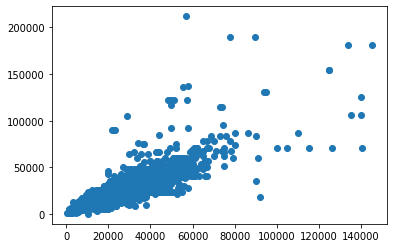

In [ ]:
X_test = X_test[X.columns]
predictions = np.exp(model.predict(sm.add_constant(X_test)))
results = pd.DataFrame()
results['Y_test'] = Y_test
results['predictions_OLS'] = predictions.values
plt.scatter(results['Y_test'], results['predictions_OLS'])
mse_OLS = np.mean((results['Y_test'] - results['predictions_OLS']) ** 2)
mse_trivial = np.mean((results['Y_test'] - df_1['price'].mean()) ** 2)

Построил модель решающего дерева. В этой и дальнейших моделях использую выборки без отсева мультиколлинеарности и факторов с низкими P-значениями

In [ ]:
import sklearn
from sklearn import tree
decision_tree = tree.DecisionTreeRegressor(max_depth = 80, min_samples_leaf = 40, min_impurity_decrease = 0.01).fit(X_train_not_for_ols, Y_train_not_for_ols)
pred_tree = decision_tree.predict(X_test_not_for_ols)
results['predictions_dt'] = pred_tree
mse_decision_tree = np.mean((results['Y_test'] - results['predictions_dt']) ** 2)

Модель случайного леса

In [ ]:
from sklearn import ensemble
rf = sklearn.ensemble.RandomForestClassifier(n_estimators = 1100, max_depth = 7, min_impurity_decrease = 0.00003, min_samples_leaf = 700).fit(X_train_not_for_ols, Y_train_not_for_ols)
pred_rf = rf.predict(X_test_not_for_ols)
results['predictions_rf'] = pred_rf
mse_random_forest = np.mean((results['Y_test'] - results['predictions_rf']) ** 2)

Градиентный бустинг

In [ ]:
gb = sklearn.ensemble.GradientBoostingRegressor(n_estimators = 1000, learning_rate = 0.05, max_depth = 15, min_impurity_decrease = 0.0001, min_samples_leaf = 150).fit(X_train_not_for_ols, Y_train_not_for_ols)
gradient = gb.predict(X_test_not_for_ols)
results['predictions_gb'] = gradient
mse_gradient_boosting = np.mean((results['Y_test'] - results['predictions_gb']) ** 2)

Нейросеть

In [ ]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(activation='relu', alpha=0.0001,  learning_rate='constant', learning_rate_init=0.001, max_iter=50000).fit(X_train_not_for_ols, Y_train_not_for_ols)
pred_nn = nn.predict(X_test_not_for_ols)
results['predictions_nn'] = pred_nn
mse_nn = np.mean((results['Y_test'] - results['predictions_nn']) ** 2)


В словарь добавил виды машинного обучения и полученные среднеквадратичные ошибки, вывел наилучший способ и значение

In [ ]:
dict_ml = {'OLS' : mse_OLS, 'decision tree' : mse_decision_tree, 'random forest' : mse_random_forest, 'gradient boosting' : mse_gradient_boosting, 'neural network' : mse_nn, 'trivial' : mse_trivial}
sorted_tuples = sorted(dict_ml.items(), key=lambda item: item[1])
sorted_dict = {k: v for k, v in sorted_tuples}
sorted_dict
print('Минимальное значение среднеквадратичной ошибки достигается при методе машинного обучения',min(dict_ml, key = dict_ml.get), 'с результатом ', dict_ml[min(dict_ml, key = dict_ml.get)].astype(int))

Минимальное значение среднеквадратичной ошибки достигается при методе машинного обучения gradient boosting с результатом  5496826


In [ ]:
dict_ml

{'OLS': 27355398.036800086,
 'decision tree': 10224482.160376998,
 'random forest': 53754085.783354856,
 'gradient boosting': 5496999.317626082,
 'neural network': 10811527.492463812,
 'trivial': 101025529.18629645}

Сформировал график для словаря выше

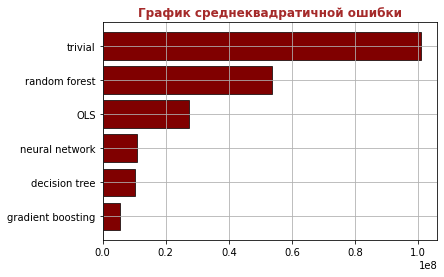

In [ ]:
plt.barh(range(len(sorted_dict)), list(sorted_dict.values()),  edgecolor="black", linewidth=0.7, color = 'maroon')
plt.yticks(range(len(sorted_dict)), list(sorted_dict.keys()))
plt.grid()
plt.title('График среднеквадратичной ошибки', color = 'brown', weight = 'bold')
plt.show()

In [ ]:
results.to_excel('/content/predictions_price_for_cars.xlsx')

In [ ]:
results

,Y_test,predictions_OLS,predictions_dt,predictions_rf,predictions_gb,predictions_nn
51052,45000,27582.002139,25811.150000,19995,26678.355934,20196.024760
24585,7695,11123.885957,7648.279070,9995,7548.413681,7173.956436
1885,11495,10622.592767,11174.764706,19995,12484.458079,9871.644310
25637,10698,13103.208323,9966.615385,9995,10043.824656,9128.662504
10059,23000,12477.415453,19664.980769,19995,19948.478921,18776.736705
...,...,...,...,...,...,...
30685,16800,18078.643980,16283.629032,9995,15744.433457,14135.707751
89870,24910,27716.837295,26162.794118,19995,28229.994776,25519.649416
63557,7495,9973.381895,7983.411765,6995,8056.393338,6923.872028
92752,22500,24063.472408,24123.562500,19995,23266.634947,24474.008779


In [ ]:
from sklearn. metrics import mean_absolute_error as mae

In [ ]:
results['trivial'] = results['Y_test'].mean()

In [ ]:
mae_OLS = mae(results['Y_test'], results['predictions_OLS'])
mae_dt = mae(results['Y_test'], results['predictions_dt'])
mae_rf = mae(results['Y_test'], results['predictions_rf'])
mae_gb = mae(results['Y_test'], results['predictions_gb'])
mae_nn = mae(results['Y_test'], results['predictions_nn'])
mae_trivial = mae(results['Y_test'], results['trivial'])

In [ ]:
dict_mae = {'OLS' : mae_OLS, 'decision tree' : mae_dt, 'random forest' : mae_rf, 'gradient boosting' : mae_gb, 'neural network' : mae_nn, 'trivial' : mae_trivial}
sorted_tuples = sorted(dict_mae.items(), key=lambda item: item[1])
sorted_dict = {k: v for k, v in sorted_tuples}
sorted_dict
print('Минимальное значение средней абсолютной ошибки достигается при методе машинного обучения',min(dict_mae, key = dict_mae.get), 'с результатом ', dict_mae[min(dict_mae, key = dict_mae.get)].astype(int))

Минимальное значение средней абсолютной ошибки достигается при методе машинного обучения gradient boosting с результатом  1260


In [ ]:
dict_mae

{'OLS': 3238.9275790206207,
 'decision tree': 1664.5703281712094,
 'random forest': 4354.775930707983,
 'gradient boosting': 1260.623507948324,
 'neural network': 1946.6186752900633,
 'trivial': 7189.2777744436125}

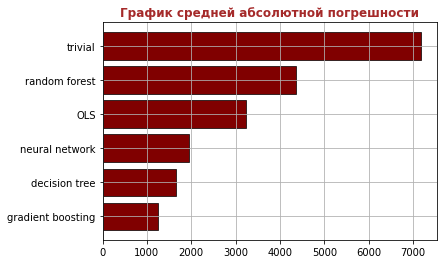

In [ ]:
plt.barh(range(len(sorted_dict)), list(sorted_dict.values()),  edgecolor="black", linewidth=0.7, color = 'maroon')
plt.yticks(range(len(sorted_dict)), list(sorted_dict.keys()))
plt.grid()
plt.title('График cредней абсолютной погрешности', color = 'brown', weight = 'bold')
plt.show()

In [ ]:
from sklearn. metrics import mean_absolute_percentage_error as mape

In [ ]:
mape_OLS = mape(results['Y_test'], results['predictions_OLS'])
mape_dt = mape(results['Y_test'], results['predictions_dt'])
mape_rf = mape(results['Y_test'], results['predictions_rf'])
mape_gb = mape(results['Y_test'], results['predictions_gb'])
mape_nn = mape(results['Y_test'], results['predictions_nn'])
mape_trivial = mape(results['Y_test'], results['trivial'])
dict_mape = {'OLS' : mape_OLS, 'decision tree' : mape_dt, 'random forest' : mape_rf, 'gradient boosting' : mape_gb, 'neural networ' : mape_nn, 'trivial' : mape_trivial}
sorted_tuples = sorted(dict_mape.items(), key=lambda item: item[1])
sorted_dict = {k: v for k, v in sorted_tuples}
sorted_dict
print('Минимальное значение cредней абсолютной процентной погрешности достигается при методе машинного обучения',min(dict_mape, key = dict_mape.get), 'с результатом ', dict_mape[min(dict_mape, key = dict_mape.get)].astype(float))

Минимальное значение cредней абсолютной процентной погрешности достигается при методе машинного обучения gradient boosting с результатом  0.07707215452172725


In [ ]:
dict_mape

{'OLS': 0.1997803386417073,
 'decision tree': 0.10081470838232007,
 'random forest': 0.26185876237059297,
 'gradient boosting': 0.07707215452172725,
 'neural networ': 0.13157613150124847,
 'trivial': 0.5633158017476726}

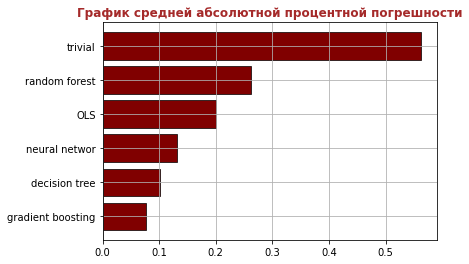

In [ ]:
plt.barh(range(len(sorted_dict)), list(sorted_dict.values()),  edgecolor="black", linewidth=0.7, color = 'maroon')
plt.yticks(range(len(sorted_dict)), list(sorted_dict.keys()))
plt.grid()
plt.title('График cредней абсолютной процентной погрешности', color = 'brown', weight = 'bold')
plt.show()